Part 1: OOP

A.

a)	The classes are: 

-	GeneralNeuron
-	SensoryNeuron
-	MotorNeuron
-	Photoreceptor
-	Mechanoreceptor
-	AlphaMotorNeuron
-	GammaMotorNeuron

b)	There is a hierarchy between the classes:

The GeneralNeuron serves as base for all other classes.

The SensoryNeuron and the MotorNeuron classes inherit from GeneralNeuron.

Photoreceptor and Mechanoreceptor inherit from SensoryNeuron, since they are both sensory neurons.

AlphaMotorNeuron and GammaMotorNeuron inherit fron MotorNeuron, since they are both motor neurons.

c)	*diagram* ~ run the code so you'll see it!
 

B.

a)	The GeneralNeuron is the base.

SensoryNeuron and MotorNeuron are the intermediate classes.

The leaf classes are the Photoreceptor, Mechanoreceptor, AlphaMotorNeuron and the GammaMotorNeuron.

b)	 Base class:
---------------------------


GeneralNeuron:

Attribute: firing_rate (numerical value)

Method: activate() (calculate firing rate based on stimulus)


c)	Intermediate classes: 
---------------------------


SensoryNeuron (inherits from GeneralNeuron):

Attribute: receptor_type: (Indicates the type of stimulus, e.g. “light” or “pressure”)

Method: sense_stimulus() (process the specific stimulus).

----

MotorNeuron (inherits from GeneralNeuron):

Attribute: target_muscle (e.g. "skeletal muscle" or “muscle spindle”).

Method: control_muscle() (trigger muscle response).

d)	Leaf classes:
---------------------------



Photoreceptor (inherits from SensoryNeuron):

Attribute: Fixed receptor_type = " light".

Method: light_detection() (specific response to light intensity).

---

Mechanoreceptor (inherits from SensoryNeuron):

Attribute: Fixed receptor_type = "pressure".

Method: pressure_detection() (specific response to pressure).

---

AlphaMotorNeuron (inherits from MotorNeuron):

Attribute: target_muscle = "skeletal muscle".

Method: skeletal_muscle_control() (specific muscle contraction behavior).

---

GammaMotorNeuron (inherits from MotorNeuron):

Attribute: Fixed target_muscle = "muscle spindle".

Method: muscle_spindle_control() (adjust muscle spindle tension).





 







    


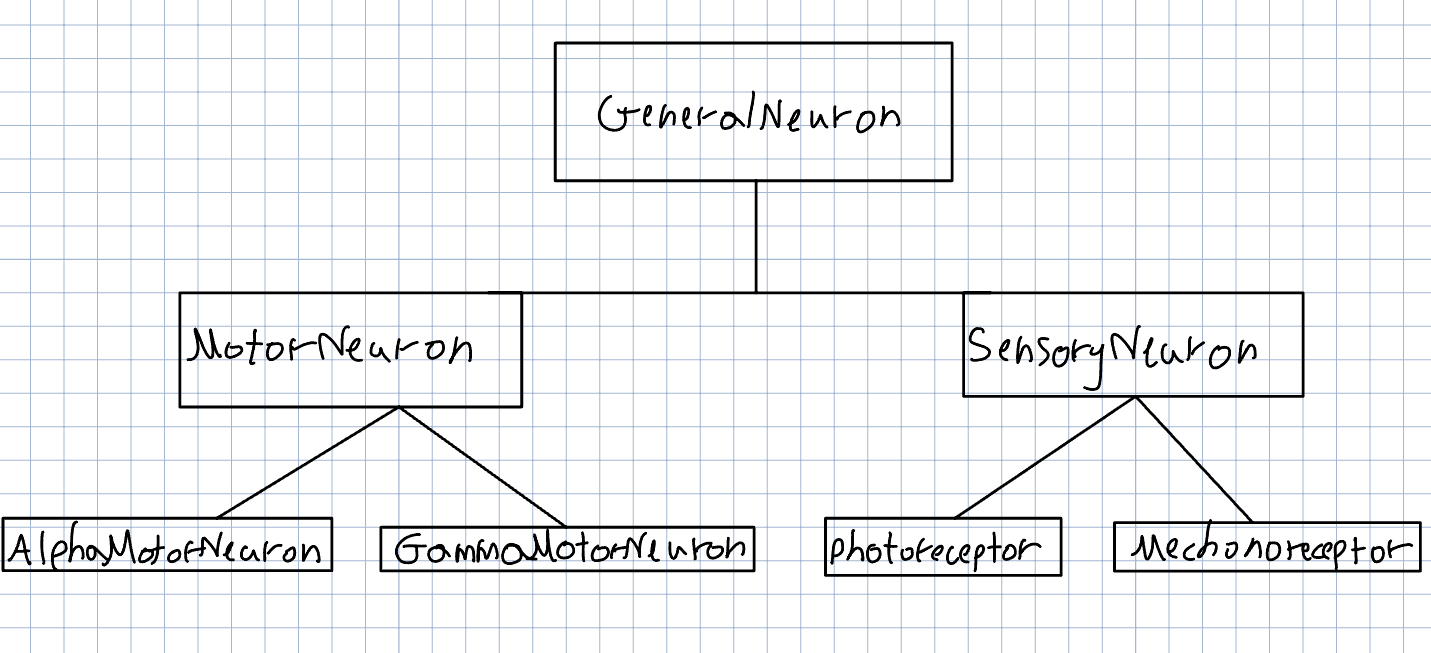

In [33]:
# Base class
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate # A numerical value representing how frequently the neuron "fires"

    def activate(self):
        ### calculates firing rate
        pass

# Intermediate class: SensoryNeuron
class SensoryNeuron(GeneralNeuron):
    def __init__(self,firing_rate, receptor_type):
         super().__init__(firing_rate)  # Call the parent constructor
         self.receptor_type = receptor_type  # The type of stimulus the neuron detects
       
    def sense_stimulus(self, stimulus):
        ### Processes the specific stimulus it is sensitive to and activates the neuron accordingly
        pass

# Intermediate class: MotorNeuron
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate) # Call the parent constructor
        self.target_muscle = target_muscle # Specifies the muscle controlled by the motor neuron.
    
    def control_muscle(self,activation_level):
        ### Triggers response.
        pass

# Leaf class: Photoreceptor
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "light") # Fixed receptor_type = "light"
    
    def light_detection(self, light_intensity):
        ### Triggers response to light intensity.
        pass

# Leaf class: Mechanoreceptor
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "pressure")  # Fixed receptor_type = "pressure"

    def pressure_detection(self, pressure_level):
        ### Triggers response to pressure.
        pass

# Leaf class: AlphaMotorNeuron
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "skeletal muscle")  # Fixed target_muscle = "skeletal muscle"

    def skeletal_muscle_control(self, activation_level):
        ### Specific muscle contraction behavior for skeletal muscles.
        pass

# Leaf class: GammaMotorNeuron
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "muscle spindle")  # Fixed target_muscle = "muscle spindle"

    def muscle_spindle_control(self, activation_level):
        ### Adjusts muscle spindle tension in response to activation.
        pass

from IPython.display import Image, display

# Path to your image
image_path = "/Users/ohadgonen/Desktop/Neuroscience/Year 2/1st semester/Advenced programming in Python/Training/MiniProject1/IMG_0950.jpg"

# Display the image
display(Image(filename=image_path))

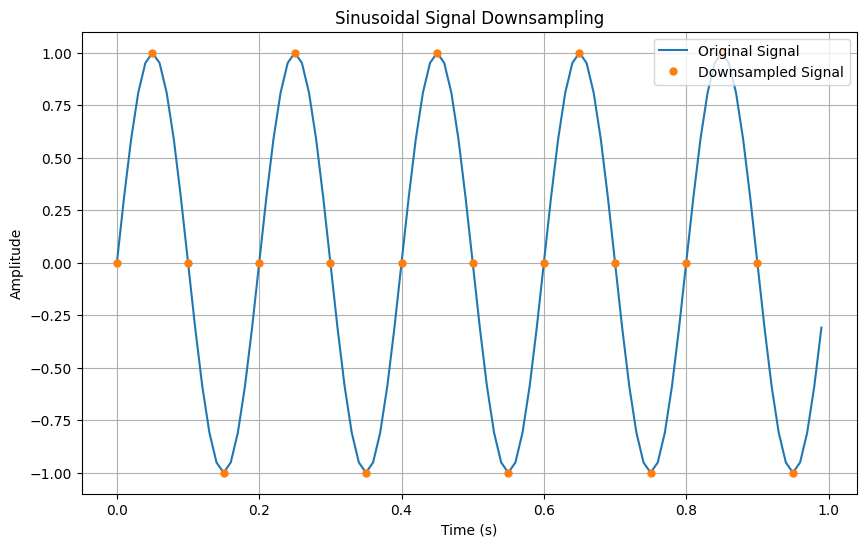

In [ ]:
# Part 2

import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal, sampling_interval): # signal is a numpy array, sampling_interval is the step size
    # Identify maxima and minima
    # we do this by looking at the the points where the sign of the second derivative changes

    # Identify maxima (derivative changes from + to -)
    maxima_indices = (np.diff(np.sign(np.diff(signal))) < 0).nonzero()[0] + 1
    # Identify maxima (derivative changes from + to -)
    minima_indices = (np.diff(np.sign(np.diff(signal))) > 0).nonzero()[0] + 1

    # Preserve maxima and minima with no duplicates
    critical_indices = np.union1d(maxima_indices, minima_indices)

    # Downsample the signal
    downsampled_indices = np.arange(0, len(signal), sampling_interval)
    all_indices = np.union1d(critical_indices, downsampled_indices)
    all_indices = np.sort(all_indices)

    return all_indices, signal[all_indices]

# Generate a sinusoidal signal
t = np.arange(0, 1, 0.01)  # 1 second sampled at 0.01 seconds
frequency = 5  # Hz
signal = np.sin(2 * np.pi * frequency * t)

# Downsample while preserving maxima and minima
indices, downsampled_signal = downsample_signal(signal, 5)

# Plot to verify
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Original Signal")
plt.plot(t[indices], downsampled_signal, 'o', label="Downsampled Signal", markersize=5)
plt.legend()
plt.title("Sinusoidal Signal Downsampling")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


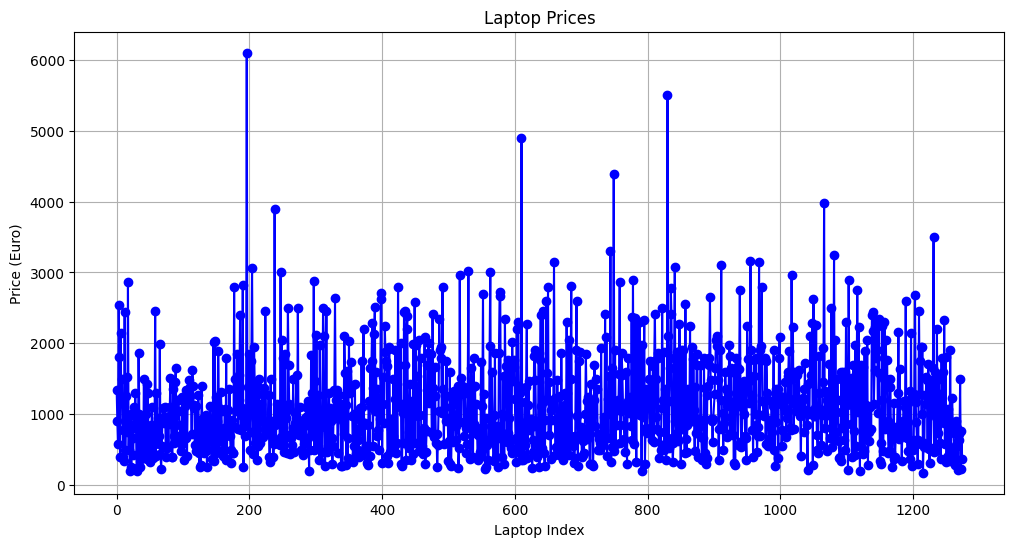

In [ ]:
# Part 3

import pandas as pd
import matplotlib.pyplot as plt

# Plot the price of all the laptops

excel_file = 'laptop_price - dataset.xlsx'  
data_base = pd.read_excel(excel_file)

# Ensure 'Price (Euro)' is numeric and handle errors by converting invalid values to NaN
data_base['Price (Euro)'] = pd.to_numeric(data_base['Price (Euro)'], errors='coerce')
# Drop rows with missing values in the 'Price (Euro)' column
prices = data_base['Price (Euro)'].dropna()

# Plot the price of all the laptops
plt.figure(figsize=(12, 6))
plt.plot(prices, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('Laptop Prices')
plt.xlabel('Laptop Index') 
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()

In [18]:
# Which company has on average the most expensive laptop? What is the average laptop price for each company?

# Group by the 'Company' and calculate the average price for each company
avg_price_by_company = data_base.groupby('Company')['Price (Euro)'].mean()

# Find the company with the highest average price
most_expensive_company = avg_price_by_company.idxmax()
highest_avg_price = avg_price_by_company.max()

# Print the average price for each company and the company with the highest average price
print("Average Laptop Price for Each Company:")
print(avg_price_by_company)
print(f"\nCompany with the Most Expensive Laptops on Average:", most_expensive_company)
print(f"Average Price:", highest_avg_price,"Euro")


Average Laptop Price for Each Company:
Company
Acer          633.464455
Apple        1544.463500
Asus         1117.696821
Chuwi         314.296667
Dell         1174.941429
Fujitsu       729.000000
Google       1677.666667
HP           1065.827180
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1712.896923
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

Company with the Most Expensive Laptops on Average: Razer
Average Price: 3346.1428571428573 Euro


In [19]:
# Find the different types of Operating systems present in the data - under the column name "OpSys".

# Inspect unique values in the 'OpSys' column
unique_os = data_base['OpSys'].unique()
# Standardize the operating systems (convert to lowercase and strip leading/trailing spaces)
data_base['OpSys'] = data_base['OpSys'].str.lower().str.strip()
# Inspect unique values again after standardization
unique_os_after_standardization = data_base['OpSys'].unique()
print("\nUnique Operating Systems (after standardization):")
print(unique_os_after_standardization)


Unique Operating Systems (after standardization):
['macos' 'no os' 'windows 10' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']


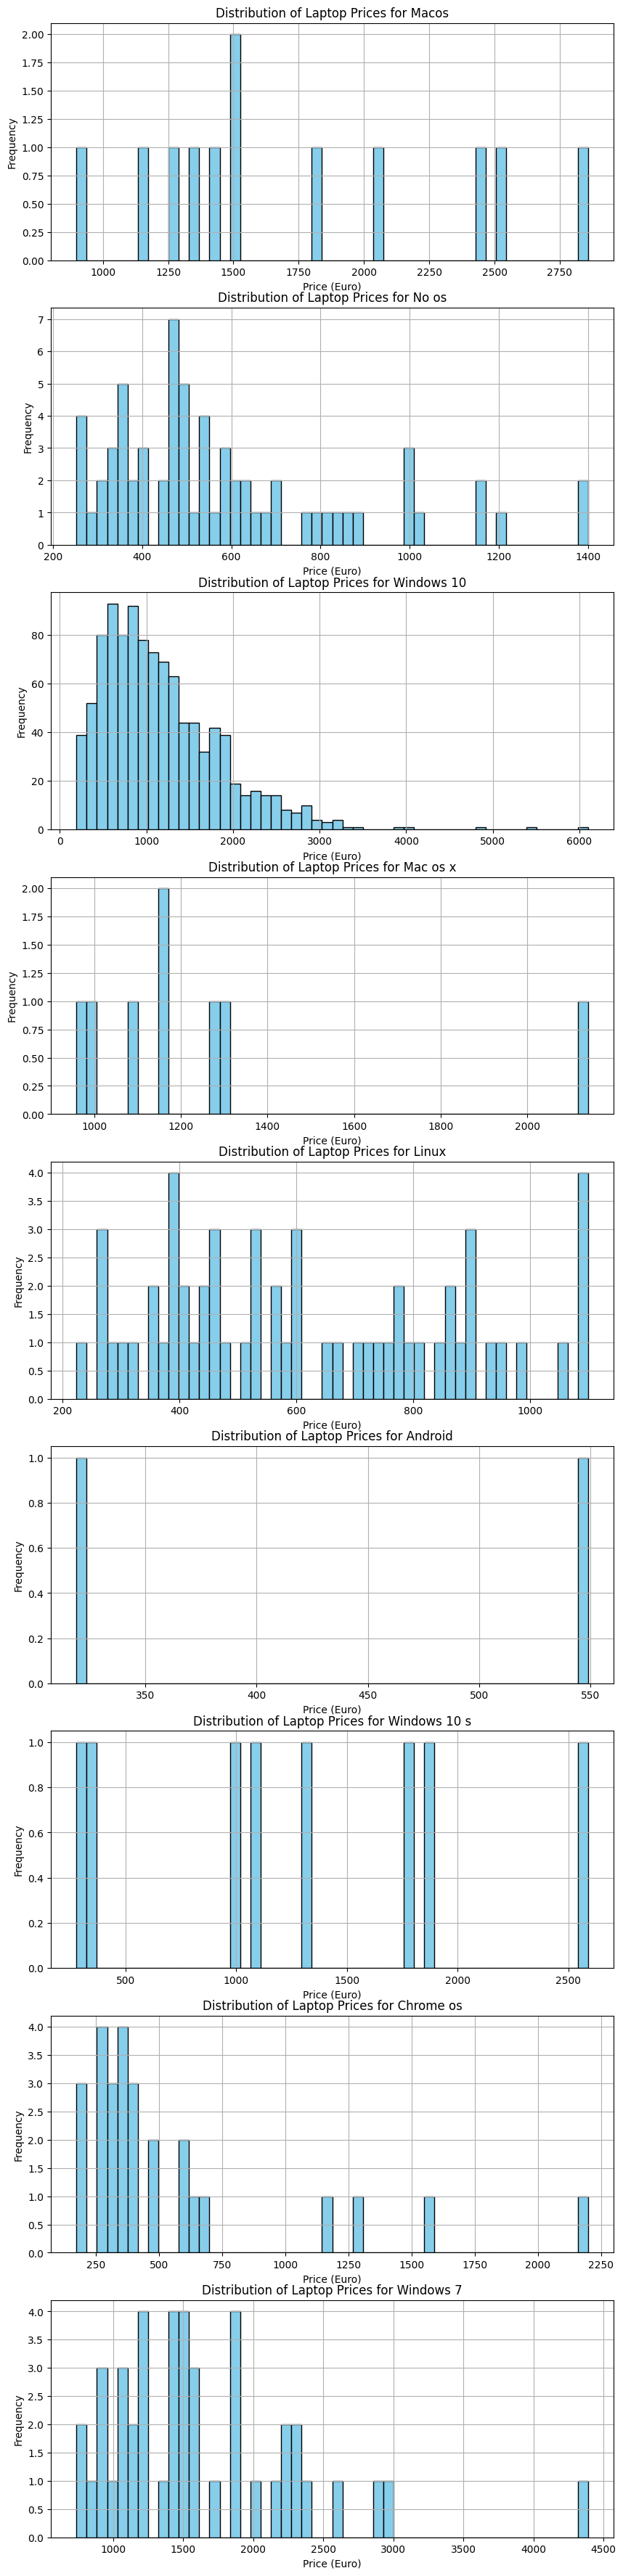

In [20]:
# Plot for each of the operating system types the distribution of the prices

num_opsys = len(unique_os_after_standardization)
# Create a grid of subplots according to the number of os
fig, axes = plt.subplots(num_opsys, 1, figsize=(10, 5 * num_opsys))

# Plot the price distribution for each operating system
for i, opsys in enumerate(unique_os_after_standardization):
    # Filter the dataset by the operating system
    os_data = data_base[data_base['OpSys'] == opsys]
    
    # Plot the distribution of prices using a histogram
    axes[i].hist(os_data['Price (Euro)'], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of Laptop Prices for {opsys.capitalize()}')
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)


<function matplotlib.pyplot.show(close=None, block=None)>

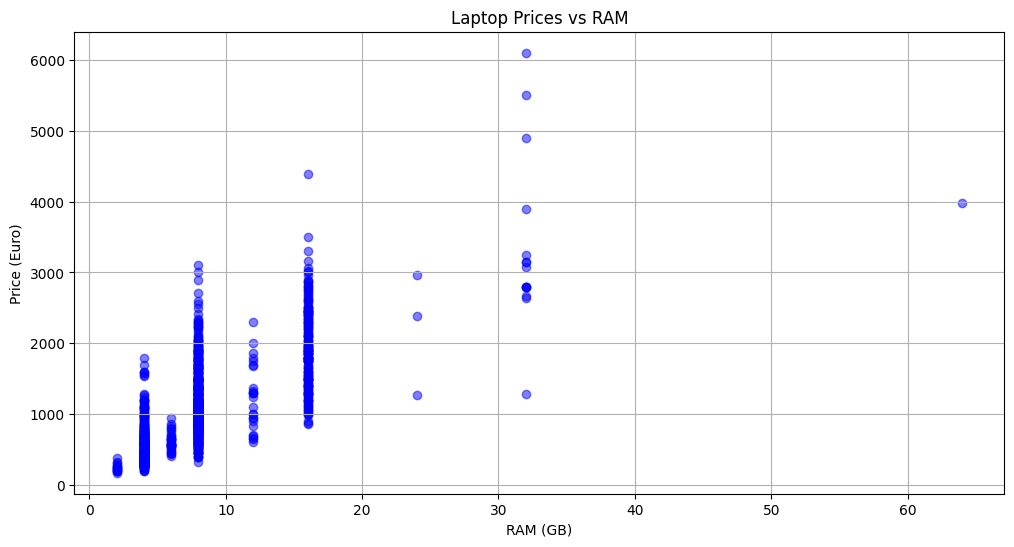

In [21]:
# What is the relationship between RAM and computer price?

# Extract RAM column
ram = data_base['RAM (GB)'] 

# Create a scatter plot graph for the relationship
plt.figure(figsize=(12, 6))
plt.scatter(ram, data_base['Price (Euro)'], color='b', alpha=0.5)
plt.title('Laptop Prices vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show


As the Laptop Prices vs RAM graph shows, the higher the RAM, usually, the higher the price.

In [22]:
# Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

# Define a list of common storage types, including multi-word types like "Flash Storage"
storage_types = ['ssd', 'hdd', 'flash storage', 'emmc', 'hybrid', 'nvme']

# Function to extract storage types 
def extract_storage_type(memory_str):
    memory_str = memory_str.lower()  
    found_storage = []
    
    # Check for each storage type in the string
    for storage in storage_types:
        if storage in memory_str:
            found_storage.append(storage)
    
     # If multiple types are found (like "SSD + HDD"), return them as a single string
    if len(found_storage) > 1:
        return ' + '.join(found_storage)  # Join with '+' if multiple types are found
    
    # If only one type is found, return the single type
    if found_storage:
        return found_storage[0]
    
    # If no known storage type is found, return 'Unknown'
    return 'Unknown'

# Apply the function to create the "Storage type" column
data_base['Storage type'] = data_base['Memory'].apply(extract_storage_type)

# Display the first few rows of the new column
print("\n The first few rows of the Storage type column: \n")
print(data_base[['Memory', 'Storage type']].head())  


 The first few rows of the Storage type column: 

                Memory   Storage type
0            128GB SSD            ssd
1  128GB Flash Storage  flash storage
2            256GB SSD            ssd
3            512GB SSD            ssd
4            256GB SSD            ssd



Storage type
Flash      544.994648
HDD        658.401226
Hybrid     875.935000
SSD       1377.191765
Name: Price (Euro), dtype: float64

The storage type with the highest average price is: SSD (1377.19 Euro)



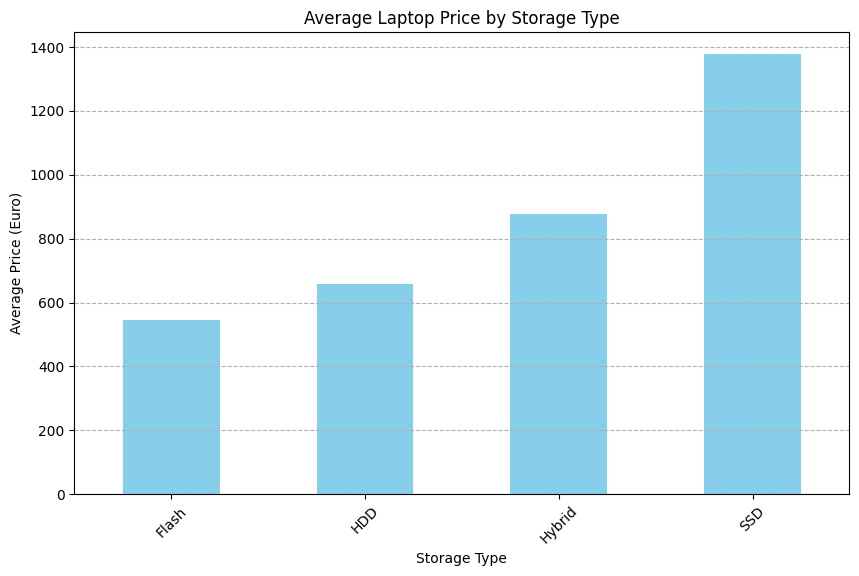

In [ ]:
# Bonus question

# What is the average price of laptops for each storage type?

# First, ensure 'Storage type' column is created based on 'Memory' column
data_base['Storage type'] = data_base['Memory'].str.extract(r'(SSD|HDD|Flash|Hybrid|eMMC|SDD|HDDs?)', expand=False)

# Group the data by 'Storage type' and calculate the mean price for each group
avg_price_by_storage = data_base.groupby('Storage type')['Price (Euro)'].mean() 
print(f"\n{avg_price_by_storage}")

# Identify the storage type with the highest average price by getting the index (storage type) of the maximum value
highest_avg_storage_type = avg_price_by_storage.idxmax() 

# Get the highest average price among all storage types
highest_avg_price = avg_price_by_storage.max()

# Print the storage type with the highest average price and the corresponding price
print(f"\nThe storage type with the highest average price is: {highest_avg_storage_type} ({highest_avg_price:.2f} Euro)\n")

# Visualize the average price for each storage type with a bar plot
plt.figure(figsize=(10, 6))
avg_price_by_storage.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Laptop Price by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
The company with the most laptops listed is: Dell (291 laptops)


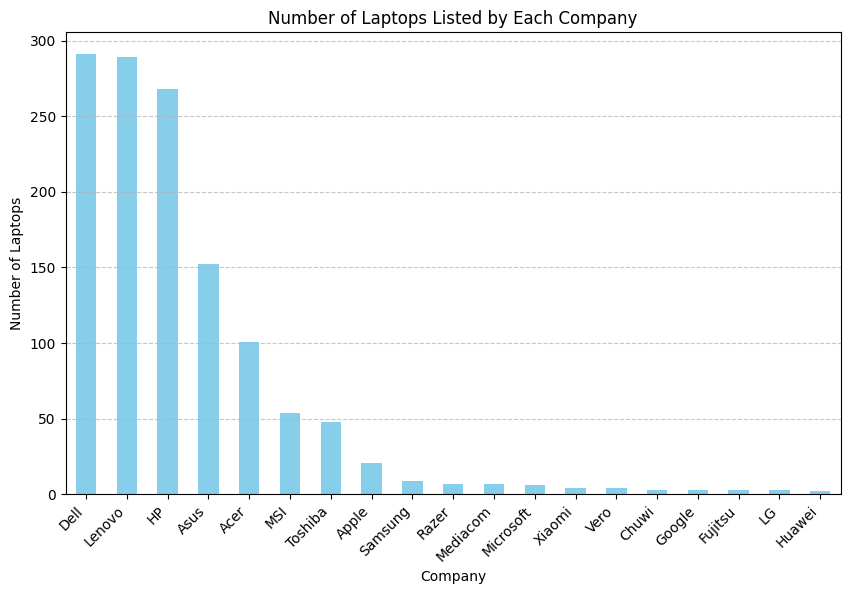

In [34]:
# Bonus question

# Which company has the most laptops listed in the dataset?

# Count the number of laptops for each company
laptop_count_by_company = data_base['Company'].value_counts()

# Print the number of laptops for each company
print(laptop_count_by_company)

# Find the company with the most laptops listed
most_laptops_company = laptop_count_by_company.idxmax()
most_laptops_count = laptop_count_by_company.max()

# Print the result
print(f"The company with the most laptops listed is: {most_laptops_company} ({most_laptops_count} laptops)")

# Visualize the average price for each storage type with a bar graph
plt.figure(figsize=(10, 6))
laptop_count_by_company.plot(kind='bar', color='skyblue')
plt.title('Number of Laptops Listed by Each Company')
plt.xlabel('Company')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45, ha='right')  # Rotate company names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

Two more questions: 

1. What is the correlation between laptop price and screen size?

Analysis: You can calculate the correlation coefficient between the Price (Euro) and Inches columns to understand the relationship between laptop price and screen size.

Visualization: A scatter plot would be ideal to show how laptop price varies with screen size, with screen size on the x-axis and price on the y-axis.

2. How does the average price of laptops vary across different RAM sizes?

Analysis: You can group the data by the RAM (GB) column and calculate the average price for each group to see how the price changes with different amounts of RAM.

Visualization: A bar plot can be used to visualize the average price for each RAM size, with RAM sizes on the x-axis and average price on the y-axis.